In [2]:
from typing import TypedDict, Literal

"""
    See 1_simpleGraph.ipynb before this.

    Objective: A graph with conditions to analyse your investment portfolio. This time, i can specify the target currency to convert to.
"""

class PortfolioState(TypedDict):
    invested_amount_usd: float
    total_usd: float # amount after 8% return
    target_currentcy: Literal["INR", "EUR"] # target currency to convert to, e.g. "INR", "EUR"
    total: float # amount after conversion to target currency

def calculate_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["invested_amount_usd"] * 1.08  # amount after 8% return
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 82.0 # amount after conversion to inr
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 0.91 # amount after conversion to eur
    return state 

def get_target_currentcy(state: PortfolioState) -> Literal["INR", "EUR"]:
    return state["target_currentcy"]

In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

# Adding nodes to the graph
builder.add_node("calculates_total_node", calculate_total) # Syntax: "<name of node>", <function that the node will execute>
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)  

# Adding edges to the graph
builder.add_edge(START, "calculates_total_node") # Syntax: <from node>, <to node>; START and END are special nodes. More specifically, the START Node is a special node that represents the node that sends user input to the graph.
builder.add_conditional_edges(
    "calculates_total_node",
    get_target_currentcy,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node"
    }
)
builder.add_edge("convert_to_inr_node", END)
builder.add_edge("convert_to_eur_node", END)

graph = builder.compile() 

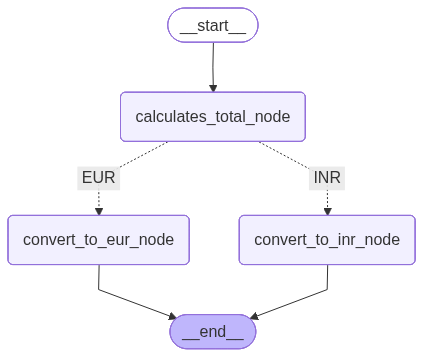

In [5]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png())) # visualize the graph

In [ ]:
graph.invoke({"invested_amount_usd": 1000.0, "target_currentcy": "EUR"}) # invoke the graph with initial state

{'invested_amount_usd': 1000.0,
 'total_usd': 1080.0,
 'target_currentcy': 'INR',
 'total': 88560.0}

In [9]:
graph.invoke({"invested_amount_usd": 1000.0, "target_currentcy": "EUR"}) # invoke the graph with initial state

{'invested_amount_usd': 1000.0,
 'total_usd': 1080.0,
 'target_currentcy': 'EUR',
 'total': 982.8000000000001}